<a href="https://colab.research.google.com/github/NNRahat/PyTorch_projects/blob/main/dogs_and_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms
from torch import nn
import os

## downloading the dataset from kaggle

In [2]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:03<00:00, 254MB/s]
100% 1.06G/1.06G [00:04<00:00, 283MB/s]


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## data_path

In [4]:
from pathlib import Path
data_path = Path("dogs_vs_cats")
data_path

PosixPath('dogs_vs_cats')

## extracting the .zip file

In [5]:
if data_path.is_dir():
  print(f"directory {data_path} already exists")
else:
  # unzip the file
  import zipfile
  zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
  zip_ref.extractall('/content')
  zip_ref.close()

In [6]:
!ls

dogs_vs_cats  dogs-vs-cats.zip	kaggle.json  sample_data  test	train


## train and test dir

In [7]:
train_dir = data_path / "train"
test_dir = data_path / "test"

In [8]:
!apt install subversion
!svn checkout https://github.com/NNRahat/PyTorch_helper_scripts/trunk/going_moduler

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2 subversion
0 upgraded, 6 newly installed, 0 to remove and 15 not upgraded.
Need to get 2,355 kB of archives.
After this operation, 10.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libapr1 amd64 1.6.5-1ubuntu1 [91.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libaprutil1 amd64 1.6.1-4ubuntu2.1 [84.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libserf-1-1 amd64 1.3.9-8build1 [45.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 libutf8proc2 amd64 2.5.0-1 [50.0 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-

## transform

### transform `with trivial augmentation`

In [9]:
transform = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

#### train and test dataloader

In [10]:
from going_moduler import data_setup, multiclass_predictions, binary_predictions, multiclass_engine, binary_engine, plot_the_results

BATCH_SIZE = 32
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir = train_dir,
    test_dir = test_dir,
    transform = transform,
    batch_size= BATCH_SIZE,
    num_workers = os.cpu_count()
)

### transform `without` the `trivial-augmentation`

In [11]:
transform_without_trivial = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.ToTensor()
])

#### train and test

In [12]:
from going_moduler import data_setup, multiclass_predictions, binary_predictions, multiclass_engine, binary_engine, plot_the_results

BATCH_SIZE = 32
train_dataloader_without, test_dataloader_without, class_names = data_setup.create_dataloaders(
    train_dir = train_dir,
    test_dir = test_dir,
    transform = transform_without_trivial,
    batch_size= BATCH_SIZE,
    num_workers = os.cpu_count()
)

In [13]:
image, label = next(iter(train_dataloader))
image[0]

tensor([[[0.1961, 0.1922, 0.1882,  ..., 0.8627, 0.8706, 0.8745],
         [0.2118, 0.2078, 0.2078,  ..., 0.8549, 0.8667, 0.8706],
         [0.2235, 0.2235, 0.2235,  ..., 0.8627, 0.8549, 0.8588],
         ...,
         [0.6902, 0.6627, 0.5412,  ..., 0.1490, 0.1412, 0.1294],
         [0.6863, 0.6745, 0.5725,  ..., 0.1490, 0.1451, 0.1333],
         [0.6667, 0.6667, 0.6000,  ..., 0.1490, 0.1412, 0.1255]],

        [[0.2392, 0.2353, 0.2314,  ..., 0.9294, 0.9333, 0.9294],
         [0.2471, 0.2431, 0.2431,  ..., 0.9255, 0.9255, 0.9255],
         [0.2392, 0.2353, 0.2431,  ..., 0.9294, 0.9137, 0.9137],
         ...,
         [0.6980, 0.6706, 0.5490,  ..., 0.2667, 0.2627, 0.2588],
         [0.6941, 0.6824, 0.5804,  ..., 0.2667, 0.2667, 0.2627],
         [0.6745, 0.6745, 0.6078,  ..., 0.2667, 0.2627, 0.2549]],

        [[0.1725, 0.1686, 0.1647,  ..., 0.9255, 0.9294, 0.9333],
         [0.1804, 0.1804, 0.1765,  ..., 0.9176, 0.9216, 0.9294],
         [0.1804, 0.1765, 0.1765,  ..., 0.9255, 0.9098, 0.

## model class creation with only BatchNorm2d() and conv_block_4 (`with dropouts`) & `64` neurons for `model_11`
* with (`epoch 10`) = `85`

* max came with (`transform_without_trivial`, `10 epoch`)  - `93.073%`

In [18]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  padding = 0,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 0,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 0,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 0,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 0,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 0,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 0,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 0,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*12*12,
                  out_features = 128),
        nn.Dropout(0.1),
        nn.Linear(in_features = 128,
                  out_features = 64),
        nn.Dropout(0.1),
        nn.Linear(in_features = 64,
                  out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.conv_block_4(x)
    # print(x.shape)
    # x = self.classifier(x)
    # return x

    return self.classifier(self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))))


In [19]:
torch.manual_seed(42)
model_11 = TinyVGG(input_shape = 3,
                  hidden_units = 64,
                  output_shape = 1).to(device)

### loss function and optimizer

In [20]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_11.parameters(),
                             lr = 0.001)

In [21]:
torch.manual_seed(42)
# hyper parameters
EPOCHS = 10

model_11_results = binary_engine.Binary_engine(model = model_11,
                                train_dataloader = train_dataloader_without,
                                test_dataloader = test_dataloader_without,
                                loss_fn = loss_fn,
                                optimizer = optimizer,
                                device = device,
                                epochs = EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 1
----------------
train loss: 0.67707, train acc: 62.835% | test loss: 0.58386, test_acc: 68.631%

Epoch: 2
----------------
train loss: 0.55198, train acc: 71.860% | test loss: 0.54792, test_acc: 72.154%

Epoch: 3
----------------
train loss: 0.49406, train acc: 76.460% | test loss: 0.46937, test_acc: 78.443%

Epoch: 4
----------------
train loss: 0.42679, train acc: 80.180% | test loss: 0.38647, test_acc: 81.986%

Epoch: 5
----------------
train loss: 0.34157, train acc: 85.100% | test loss: 0.37361, test_acc: 82.285%

Epoch: 6
----------------
train loss: 0.26400, train acc: 89.120% | test loss: 0.33244, test_acc: 86.425%

Epoch: 7
----------------
train loss: 0.21266, train acc: 91.420% | test loss: 0.24780, test_acc: 89.232%

Epoch: 8
----------------
train loss: 0.17524, train acc: 92.955% | test loss: 0.23326, test_acc: 91.103%

Epoch: 9
----------------
train loss: 0.14653, train acc: 94.045% | test loss: 0.17898, test_acc: 92.556%

Epoch: 10
----------------
train los

## model class creation with only BatchNorm2d() and conv_block_4 (`with dropouts`) & `70` neurons for `model_12`
* with (`epoch 10`) = `85`

* max came with (`transform_without_trivial`, `10 epoch`)  - `93.053%`

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*14*14,
                  out_features = 128),
        nn.Dropout(0.1),
        nn.Linear(in_features = 128,
                  out_features = 64),
        nn.Dropout(0.1),
        nn.Linear(in_features = 64,
                  out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.classifier(x)
    # return x

    return self.classifier(self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))))


In [ ]:
torch.manual_seed(42)
model_12 = TinyVGG(input_shape = 3,
                  hidden_units = 70,
                  output_shape = 1).to(device)

### loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_12.parameters(),
                             lr = 0.001)

In [ ]:
# hyper parameters
EPOCHS = 10

model_12_results = binary_engine.Binary_engine(model = model_12,
                                train_dataloader = train_dataloader_without,
                                test_dataloader = test_dataloader_without,
                                loss_fn = loss_fn,
                                optimizer = optimizer,
                                device = device,
                                epochs = EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 1
----------------
train loss: 0.69497, train acc: 63.750% | test loss: 0.66127, test_acc: 65.625%

Epoch: 2
----------------
train loss: 0.52937, train acc: 74.005% | test loss: 0.49961, test_acc: 75.816%

Epoch: 3
----------------
train loss: 0.45976, train acc: 78.435% | test loss: 0.44660, test_acc: 80.613%

Epoch: 4
----------------
train loss: 0.38236, train acc: 82.900% | test loss: 0.43887, test_acc: 80.195%

Epoch: 5
----------------
train loss: 0.30883, train acc: 86.690% | test loss: 0.30204, test_acc: 86.405%

Epoch: 6
----------------
train loss: 0.23950, train acc: 90.330% | test loss: 0.24147, test_acc: 90.127%

Epoch: 7
----------------
train loss: 0.18333, train acc: 92.530% | test loss: 0.17488, test_acc: 92.396%

Epoch: 8
----------------
train loss: 0.14281, train acc: 94.360% | test loss: 0.20900, test_acc: 91.162%

Epoch: 9
----------------
train loss: 0.12574, train acc: 94.895% | test loss: 0.17322, test_acc: 93.790%

Epoch: 10
----------------
train los

## model class creation with only BatchNorm2d() and conv_block_4 (`with dropouts`) & `64` neurons for `model_13`
* with (`epoch 10`) = `85`

* max came with (`transform_without_trivial`, `10 epoch`)  - `92.317%`

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*14*14,
                  out_features = 128),
        nn.Dropout(0.1),
        nn.Linear(in_features = 128,
                  out_features = 64),
        nn.Dropout(0.1),
        nn.Linear(in_features = 64,
                  out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.classifier(x)
    # return x

    return self.classifier(self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))))


In [ ]:
model_13 = TinyVGG(input_shape = 3,
                  hidden_units = 64,
                  output_shape = 1).to(device)

### loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_13.parameters(),
                             lr = 0.001)

In [ ]:
# hyper parameters
EPOCHS = 10

model_13_results = binary_engine.Binary_engine(model = model_13,
                                train_dataloader = train_dataloader_without,
                                test_dataloader = test_dataloader_without,
                                loss_fn = loss_fn,
                                optimizer = optimizer,
                                device = device,
                                epochs = EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 1
----------------
train loss: 0.71681, train acc: 61.710% | test loss: 0.58101, test_acc: 69.785%

Epoch: 2
----------------
train loss: 0.53264, train acc: 72.980% | test loss: 0.59400, test_acc: 67.357%

Epoch: 3
----------------
train loss: 0.46048, train acc: 77.955% | test loss: 0.43742, test_acc: 80.195%

Epoch: 4
----------------
train loss: 0.37148, train acc: 83.295% | test loss: 0.42698, test_acc: 82.046%

Epoch: 5
----------------
train loss: 0.29528, train acc: 87.420% | test loss: 0.31148, test_acc: 87.261%

Epoch: 6
----------------
train loss: 0.22732, train acc: 90.580% | test loss: 0.24282, test_acc: 90.307%

Epoch: 7
----------------
train loss: 0.19048, train acc: 92.310% | test loss: 0.20886, test_acc: 91.919%

Epoch: 8
----------------
train loss: 0.15796, train acc: 93.665% | test loss: 0.24386, test_acc: 89.948%

Epoch: 9
----------------
train loss: 0.12857, train acc: 94.945% | test loss: 0.17615, test_acc: 92.715%

Epoch: 10
----------------
train los

## model class creation with only BatchNorm2d() and conv_block_4 (`with dropouts`) & `128` neurons for `model_10`
* with (`epoch 10`) = `85`

* max came with (`transform_without_trivial`, `10 epoch`)  - `90.287%`

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*14*14,
                  out_features = 128),
        nn.Dropout(0.1),
        nn.Linear(in_features = 128,
                  out_features = 64),
        nn.Dropout(0.1),
        nn.Linear(in_features = 64,
                  out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.classifier(x)
    # return x

    return self.classifier(self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))))


In [ ]:
model_10 = TinyVGG(input_shape = 3,
                  hidden_units = 128,
                  output_shape = 1).to(device)

### loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_10.parameters(),
                             lr = 0.001)

In [ ]:
# hyper parameters
EPOCHS = 10

model_10_results = binary_engine.Binary_engine(model = model_10,
                                train_dataloader = train_dataloader_without,
                                test_dataloader = test_dataloader_without,
                                loss_fn = loss_fn,
                                optimizer = optimizer,
                                device = device,
                                epochs = EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 1
----------------
train loss: 0.85991, train acc: 58.750% | test loss: 0.67704, test_acc: 62.918%

Epoch: 2
----------------
train loss: 0.55523, train acc: 71.810% | test loss: 0.51605, test_acc: 74.443%

Epoch: 3
----------------
train loss: 0.50084, train acc: 75.595% | test loss: 0.46671, test_acc: 77.826%

Epoch: 4
----------------
train loss: 0.45338, train acc: 78.685% | test loss: 0.42451, test_acc: 80.076%

Epoch: 5
----------------
train loss: 0.37958, train acc: 83.065% | test loss: 0.40493, test_acc: 81.668%

Epoch: 6
----------------
train loss: 0.30741, train acc: 87.080% | test loss: 0.28681, test_acc: 87.480%

Epoch: 7
----------------
train loss: 0.24740, train acc: 89.805% | test loss: 0.23778, test_acc: 89.849%

Epoch: 8
----------------
train loss: 0.20254, train acc: 91.760% | test loss: 0.21333, test_acc: 90.864%

Epoch: 9
----------------
train loss: 0.16464, train acc: 93.230% | test loss: 0.19607, test_acc: 92.178%

Epoch: 10
----------------


## model class creation with 3 convblock(convblock2d, relu, batchnorm2d, maxpool2d), (with 4 `linear` layers(with `relu`), 2 `dropouts`) & `64` neurons for `model_19`
* with (`epoch 10`) = `85`

* max came with (`transform_without_trivial`, `10 epoch`)  - `89.809%`

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*14*14,
                  out_features = 128),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.Linear(in_features = 128,
                  out_features = 64),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.Linear(in_features = 64,
                  out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.classifier(x)
    # return x

    return self.classifier(self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))))


In [ ]:
model_19 = TinyVGG(input_shape = 3,
                  hidden_units = 64,
                  output_shape = 1).to(device)

### loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_19.parameters(),
                             lr = 0.001)

In [ ]:
# hyper parameters
EPOCHS = 10

model_19_results = binary_engine.Binary_engine(model = model_19,
                                train_dataloader = train_dataloader_without,
                                test_dataloader = test_dataloader_without,
                                loss_fn = loss_fn,
                                optimizer = optimizer,
                                device = device,
                                epochs = EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 1
----------------
train loss: 0.59047, train acc: 69.015% | test loss: 0.50712, test_acc: 75.000%

Epoch: 2
----------------
train loss: 0.45198, train acc: 78.695% | test loss: 0.48747, test_acc: 76.791%

Epoch: 3
----------------
train loss: 0.34390, train acc: 84.875% | test loss: 0.33193, test_acc: 85.510%

Epoch: 4
----------------
train loss: 0.23571, train acc: 90.265% | test loss: 0.32527, test_acc: 86.923%

Epoch: 5
----------------
train loss: 0.15472, train acc: 93.755% | test loss: 0.29388, test_acc: 89.252%

Epoch: 6
----------------
train loss: 0.08817, train acc: 96.805% | test loss: 0.30693, test_acc: 88.515%

Epoch: 7
----------------
train loss: 0.06040, train acc: 97.760% | test loss: 0.35816, test_acc: 90.008%

Epoch: 8
----------------
train loss: 0.04463, train acc: 98.350% | test loss: 0.32684, test_acc: 90.506%

Epoch: 9
----------------
train loss: 0.03879, train acc: 98.760% | test loss: 0.42815, test_acc: 89.889%

Epoch: 10
----------------
train los

## predict a random image

In [ ]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

from typing import List, Tuple

from PIL import Image

def pred_and_plot_image(
    model: torch.nn.Module,
    class_names: List[str],
    image_path: str,
    image_size: Tuple[int, int] = (224, 224),
    transform: torchvision.transforms = None,
    device: torch.device = device,
):
    # Open image
    img = Image.open(image_path)

    # Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose(
            [
                transforms.Resize(image_size),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
                ),
            ]
        )

    ### Predict on image ###

    # Make sure the model is on the target device
    model.to(device)

    # Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
        transformed_image = image_transform(img).unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(transformed_image.to(device))

    # Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.sigmoid(target_image_pred)

    # Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.round(target_image_pred_probs).type(torch.int64).item()
    # Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)
    plt.title(
        f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}"
    )
    plt.axis(False)

In [ ]:
!wget https://images.unsplash.com/photo-1592769606534-fe78d27bf450
!cp photo-1592769606534-fe78d27bf450 dog2.jpg

--2023-06-19 17:50:35--  https://images.unsplash.com/photo-1592769606534-fe78d27bf450
Resolving images.unsplash.com (images.unsplash.com)... 146.75.78.208, 2a04:4e42:84::720
Connecting to images.unsplash.com (images.unsplash.com)|146.75.78.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7689149 (7.3M) [image/jpeg]
Saving to: ‘photo-1592769606534-fe78d27bf450’

photo-1592769606534 100%[===================>]   7.33M  --.-KB/s    in 0.08s   

2023-06-19 17:50:35 (86.4 MB/s) - ‘photo-1592769606534-fe78d27bf450’ saved [7689149/7689149]



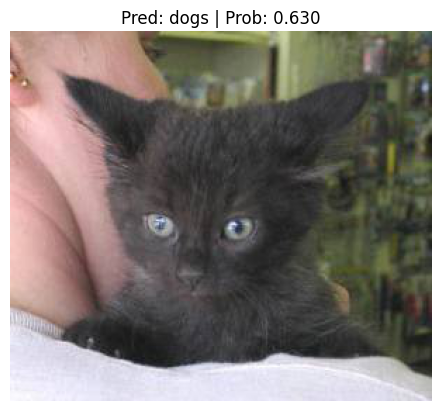

In [ ]:
IMAGE_PATH = "/content/cat.jpg"
from going_moduler import binary_predictions
pred_and_plot_image(model = model_1,
                                class_names = class_names,
                                image_path = IMAGE_PATH,
                                device = device)